#TASK1- LSTM time series forecasting

In [17]:
import pandas as pd
stock_data=pd.read_csv("./Historical_price_APPL.csv")
stock_data.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [18]:
stock_data.isna().sum()

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

There are no missing values in dataset


In [19]:
stock_data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [20]:
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [24]:
stock_data[[' Close/Last','Date']]

,Close/Last,Date
0,$273.36,02/28/2020
1,$273.52,02/27/2020
2,$292.65,02/26/2020
3,$288.08,02/25/2020
4,$298.18,02/24/2020
...,...,...
2513,$31.2786,03/05/2010
2514,$30.1014,03/04/2010
2515,$29.9043,03/03/2010
2516,$29.8357,03/02/2010


In [27]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [29]:
stock_data[' Close/Last'] = stock_data[' Close/Last'].replace('[\$,]', '', regex=True).astype(float)


In [33]:
stock = stock_data.iloc[::-1].reset_index(drop=True)
stock

,Date,Close/Last,Volume,Open,High,Low
0,2010-03-01,29.8557,137312041,$29.3928,$29.9286,$29.35
1,2010-03-02,29.8357,141486282,$29.99,$30.1186,$29.6771
2,2010-03-03,29.9043,92846488,$29.8486,$29.9814,$29.7057
3,2010-03-04,30.1014,89591907,$29.8971,$30.1314,$29.8043
4,2010-03-05,31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...,...
2513,2020-02-24,298.1800,55548830,$297.26,$304.18,$289.23
2514,2020-02-25,288.0800,57668360,$300.95,$302.53,$286.13
2515,2020-02-26,292.6500,49678430,$286.53,$297.88,$286.5
2516,2020-02-27,273.5200,80151380,$281.1,$286,$272.96


In [ ]:
# stock=stock.head(300)

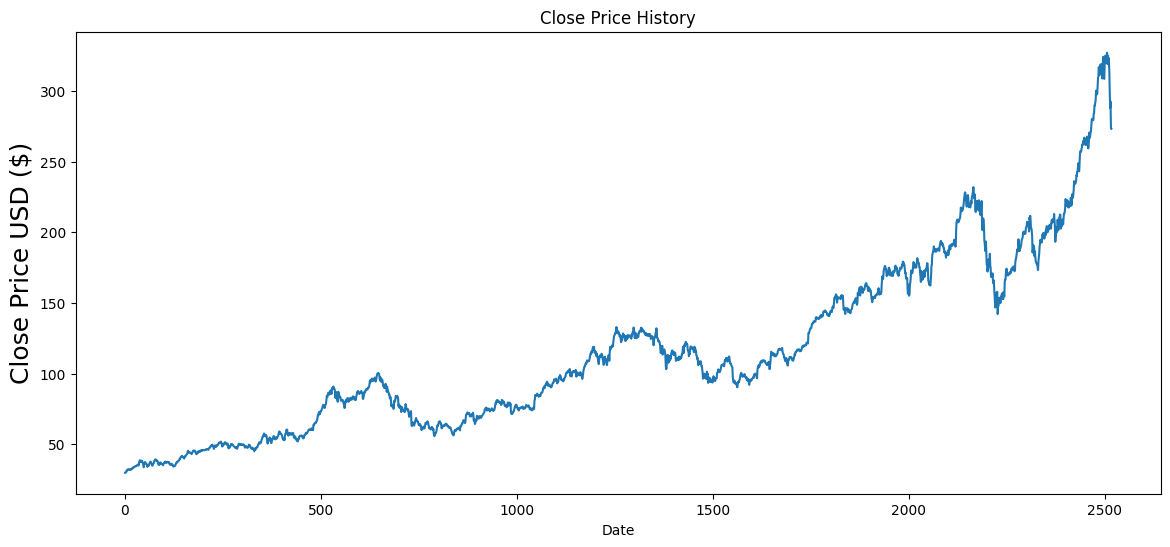

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(stock[' Close/Last'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler
data = stock.filter([' Close/Last'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data[:10]

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       [8.93516807e-04],
       [4.85229733e-03],
       [4.91451059e-03],
       [6.80747487e-03],
       [7.68182327e-03],
       [7.99894271e-03],
       [8.52725092e-03]])

In [38]:
import numpy as np
#trainig data
training_data_len = int(np.ceil( len(dataset) * .95 ))

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        #print(x_train)
        #print(y_train)
        print("ok")

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

ok
ok


(2333, 60, 1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 181s 75ms/step - loss: 5.9430e-04


In [40]:
#testing
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 35ms/step


7.027520784670302

<ipython-input-41-5531fbeeee4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


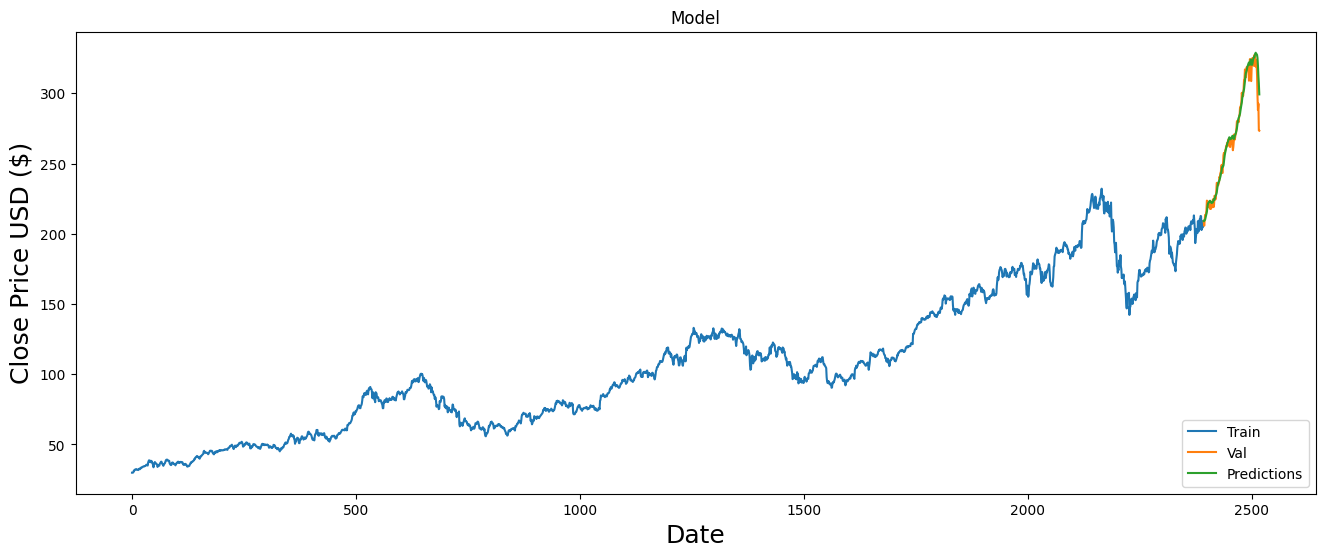

In [41]:
# Ploting data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[' Close/Last'])
plt.plot(valid[[' Close/Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Task2-Implement a basic anomaly detection algorithm from scratch

In [42]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2024-04-12 11:22:19--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-04-12 11:22:19 (36.8 MB/s) - ‘iris.csv’ saved [3716/3716]



       sepal_length  sepal_width
count    150.000000   150.000000
mean       5.843333     3.054000
std        0.828066     0.433594
min        4.300000     2.000000
25%        5.100000     2.800000
50%        5.800000     3.000000
75%        6.400000     3.300000
max        7.900000     4.400000


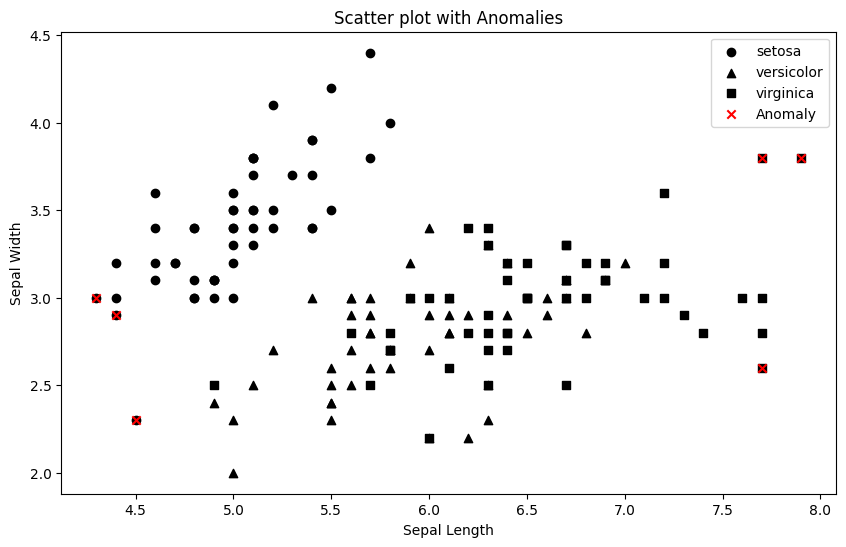

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Import data
data = pd.read_csv("./iris.csv")

# Input data
df = data[["sepal_length", "sepal_width", "species"]]
print(df.describe())

# Fit One-Class SVM
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05).fit(df[["sepal_length", "sepal_width"]])
y_pred = model.predict(df[["sepal_length", "sepal_width"]])
anomaly_values = df.iloc[np.where(y_pred == -1)]

# Plot
plt.figure(figsize=(10, 6))
species = df["species"].unique()
anomaly_color = "red"

# Define marker shapes for each species
markers = {"setosa": "o", "versicolor": "^", "virginica": "s"}

for specie in species:
    plt.scatter(df[df["species"] == specie]["sepal_length"],
                df[df["species"] == specie]["sepal_width"],
                c="black",  # Black color for species points
                label=specie,
                marker=markers[specie])  # Use the specified marker shape

plt.scatter(anomaly_values["sepal_length"],
            anomaly_values["sepal_width"],
            c=anomaly_color,
            label="Anomaly",
            marker="x")  # Use 'x' marker for anomalies

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter plot with Anomalies")
plt.legend()
plt.show()


# Task3- Write code to perform image classification using a pre-trained CNN architecture

In [45]:
!wget https://cdn.britannica.com/37/154237-050-A76A506D/blue-peafowl-tail-Indian-peacock-courtship-displays.jpg

--2024-04-12 11:22:52--  https://cdn.britannica.com/37/154237-050-A76A506D/blue-peafowl-tail-Indian-peacock-courtship-displays.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 18.239.83.111, 18.239.83.113, 18.239.83.29, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|18.239.83.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82405 (80K) [image/jpeg]
Saving to: ‘blue-peafowl-tail-Indian-peacock-courtship-displays.jpg’

blue-peafowl-tail-I 100%[===================>]  80.47K  --.-KB/s    in 0.005s  

2024-04-12 11:22:52 (15.7 MB/s) - ‘blue-peafowl-tail-Indian-peacock-courtship-displays.jpg’ saved [82405/82405]



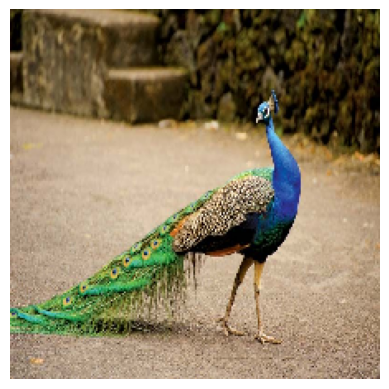

In [47]:
import numpy as np
from keras.preprocessing import image
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Load image
img_path = '/content/blue-peafowl-tail-Indian-peacock-courtship-displays.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


In [48]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=1)[0]
print('Predictions:')
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f'{i + 1}: {label} ({score:.2f})')

1/1 [==============================] - 1s 788ms/step
Predictions:
1: peacock (1.00)
